In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda')
batch_size = 32

In [3]:
train_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('data-fashion', train=True, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()), 
                                                       batch_size=batch_size, shuffle=True)

In [4]:
test_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('data-fashion', train=False, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()), 
                                                       batch_size=batch_size, shuffle=True)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, 256)
        self.fc8 = nn.Linear(256, 10)
        self.lrelu = nn.LeakyReLU(0.2, inplace=True)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.lrelu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.log_softmax(self.fc8(x), dim=1)
        return x
        

In [7]:
def train(model, train_loader, optimizer):
    model.train()
    tot_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        tot_loss += loss
    print('loss', batch_size * tot_loss.item() / len(train_loader.dataset))

In [8]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += data.size(0)
            correct += (predicted == target).sum().item()
    print('accuracy', 100*correct / total )

tensor([4, 9, 5, 8, 9, 4, 5, 9, 1, 3, 9, 6, 3, 2, 3, 2, 8, 9, 3, 5, 6, 1, 9, 8,
        4, 8, 2, 7, 0, 0, 8, 7])
torch.Size([28, 28])


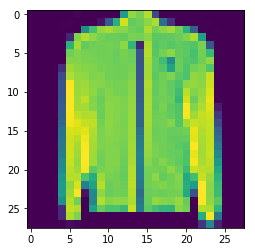

In [9]:
testData = next(iter(test_loader))
print(testData[1])
img = testData[0][0, 0, :,:]
print(img.shape)
plt.imshow(img)

In [10]:
model = Model().to(device)

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
for epoch in range(30):
    train(model, train_loader, optimizer)
    test(model, test_loader)

loss 0.6671038411458333
accuracy 81.86
loss 0.4430498046875
accuracy 85.35
loss 0.3899265950520833
accuracy 83.58
loss 0.36490745442708333
accuracy 85.75
loss 0.33773922526041666
accuracy 86.31
loss 0.32527490234375
accuracy 87.03
loss 0.3094887369791667
accuracy 86.84
loss 0.29822958984375
accuracy 85.89
loss 0.29081070963541666
accuracy 86.43
loss 0.2797154296875
accuracy 87.26
loss 0.26972664388020834
accuracy 87.55
loss 0.26719251302083336
accuracy 87.45
loss 0.25803076171875
accuracy 87.93
loss 0.2517483561197917
accuracy 88.28
loss 0.24763125
accuracy 88.63
loss 0.24130309244791667
accuracy 88.47
loss 0.23248548177083334
accuracy 87.66
loss 0.22990182291666666
accuracy 88.57
loss 0.22911609700520832
accuracy 88.44
loss 0.223005078125
accuracy 88.17
loss 0.218565478515625
accuracy 88.7
loss 0.22131940104166667
accuracy 88.47
loss 0.21546448567708334
accuracy 88.51
loss 0.2116708984375
accuracy 88.7
loss 0.19872532552083333
accuracy 88.35
loss 0.20370777994791667
accuracy 88.61
los